In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#These two lines deal with a bug on some mac computers.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#Read in the data.
data = pd.read_csv('heart.csv')

#Get all non-target columns
x = data[[c for c in data.columns if c != 'target' and c!='age']]
#Get JUST the target column
y = data['target']

#Establish input shape for network (needs to be a tuple - syntax thing.)
input_shape = (x.shape[1],)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#Make the middle section of hidden layers absurdly big:
layer_dims = [128]*20 #Set the 20 to 1 or 2 for a more appropriately-sized model

#Initialize the model.
model = Sequential()

#Add layers.
model.add(Dense(64, input_shape=input_shape, activation = 'relu'))
#Layers can be added via loops!
for l in layer_dims:
    model.add(Dense(l, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#Final layer should be 1 output node;
#Sigmoid forces predictions to be between 0 and 1
model.add(Dense(1, activation = 'sigmoid'))

#Create the optimizer:
adam = Adam(lr=0.0001)

#Compile the model. Binary Crossentropy is the best loss for binary classification.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
#PS: For more classes, you'd use 'categorical-crossentropy' - look it up!

#Get a summary of the compiled model!
#Commented out for .py version.
#model.summary()

#Finally, fit the model to the data - and store the metrics in a history variable
history = model.fit(x, y, batch_size = 64, epochs = 100, shuffle = True)

#Save the model!
model.save('heart_uci_siri')

#View loss over time - should be decreasing.
plt.plot(history.history['loss'])
plt.title('Training Loss over Time')
plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
303/303 [==============================] - 3s 11ms/step - loss: 0.6922
Epoch 2/100
303/303 [==============================] - 0s 179us/step - loss: 0.6957
Epoch 3/100
303/303 [==============================] - 0s 174us/step - loss: 0.6865
Epoch 4/100
303/303 [==============================] - 0s 174us/step - loss: 0.6726
Epoch 5/100
303/303 [==============================] - 0s 181us/step - loss: 0.6752
Epoch 6/100
303/303 [==============================] - 0s 189us/step - loss: 0.6709
Epoch 7/100
303/303 [==============================] - 0s 192us/step - loss: 0.6861
Epoch 8/100
303/303 [==============================] - 0s 191us/step - loss: 0.6667
Epoch 9/100
303/303 [==============================] - 0s 197us/step - loss: 0.6386
Epoch 10/100
303/303 [==============================] - 0s 198us/step - loss: 0.6358
Epoch 11/100
303/303 [==================

<Figure size 640x480 with 1 Axes>

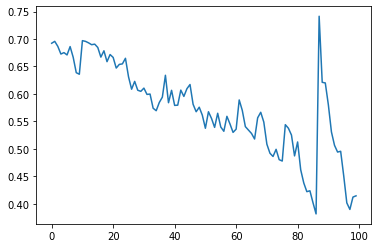

In [2]:
plt.plot(history.history['loss'])

In [70]:
#THIS IS JUST TO FIND WHAT AGE....NOT WHETHEER THEY WILL GET HEART DISEASE
from sklearn.neighbors import NearestNeighbors
import statistics
import pandas as pd
data = pd.read_csv('heart.csv')
x = data[[c for c in data.columns if c != 'target']]
neigh = NearestNeighbors(n_neighbors=2, metric = 'jaccard')
neigh.fit(x) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='jaccard',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [91]:
search_space = 10
termination_length = 10

while len(total_ages) != termination_length:
    search_space += 1
    
    total_ages = []
    flattened = neigh.kneighbors(x.sample().values, n_neighbors=search_space, return_distance=False).ravel()
    for index in flattened:
        age = data['age'][index]
        is_diseased = bool(data['target'][index])
        if is_diseased:
            total_ages.append(age)
            
print('Got {} neighbors!'.format(search_space))    
average = np.mean(total_ages)
average = int(round(average))
print(f'There is a great chance that you might be diagnosed with heart disease when you are {average} years old.')

Got 10 neighbors!
There is a great chance that you might be diagnosed with heart disease when you are 53 years old.
